In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [72]:
np.random.seed(42)

In [74]:
data = pd.DataFrame({
    'Part_ID': range(1, 10001),
    'Defective': np.random.choice([0, 1], size=10000, p=[0.965, 0.035]),
    'Defect_Type': np.random.choice(['Dimensional', 'Surface', 'Weld', 'Leak', 'Crack', 'Other'], 
                                    size=10000, p=[0.4, 0.3, 0.15, 0.05, 0.05, 0.05]),
    'Downtime_Minutes': np.random.exponential(scale=120, size=10000),
    'Machine_Age_Yrs': np.random.uniform(2, 15, 10000),
    'Vibration_Level': np.random.normal(5, 2, 10000),
    'Temperature_C': np.random.normal(65, 10, 10000),
    'Plant': np.random.choice(['Plant1', 'Plant2', 'Plant3', 'Plant4'], 10000)
})

In [76]:
defect_rate = data['Defective'].mean() * 100
downtime_percent = (data['Downtime_Minutes'].sum() / (10000 * 480)) * 100
print(f"Simulated Defect Rate: {defect_rate:.2f}%")
print(f"Simulated Downtime %: {downtime_percent:.2f}%")

Simulated Defect Rate: 3.28%
Simulated Downtime %: 24.91%


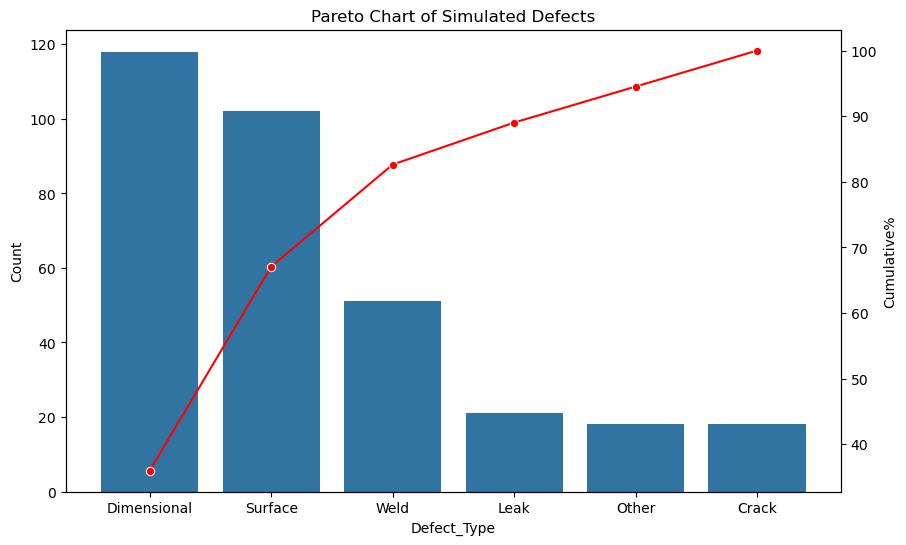

In [78]:
# Pareto Chart
defect_counts = data[data['Defective'] == 1]['Defect_Type'].value_counts().reset_index()
defect_counts.columns = ['Defect_Type', 'Count']
defect_counts['Cumulative%'] = defect_counts['Count'].cumsum() / defect_counts['Count'].sum() * 100

fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(data=defect_counts, x='Defect_Type', y='Count', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=defect_counts, x='Defect_Type', y='Cumulative%', marker='o', color='red', ax=ax2)
plt.title('Pareto Chart of Simulated Defects')
plt.savefig('pareto_defects.png', dpi=300, bbox_inches='tight')

<Axes: title={'center': 'Key Drivers of Downtime'}>

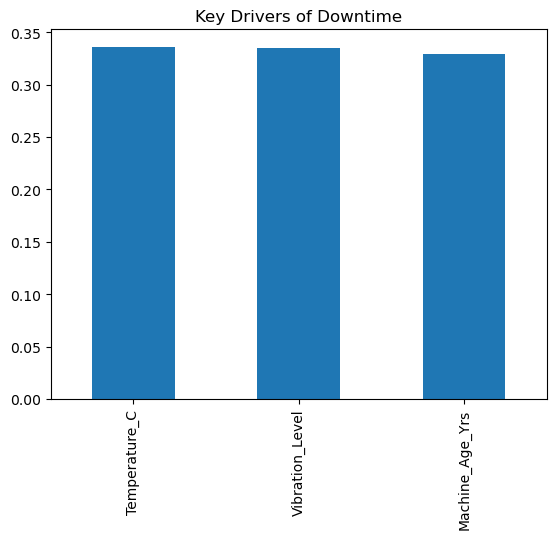

In [80]:
# Finding root causes of downtime
X = data[['Machine_Age_Yrs', 'Vibration_Level', 'Temperature_C']]
y = data['Downtime_Minutes']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Key Drivers of Downtime')